<a href="https://colab.research.google.com/github/veronicadonelli/financial-risk-return-analysis/blob/main/Risk_Return_Analysis_Performance_Evaluation_of_Financial_Assets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install pandas numpy yfinance matplotlib seaborn

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
# %%

In [ ]:
TICKERS = ["ENPH", "JPM", "NEE", "SCHW", "STNE", "XOM"]      # I titoli da analizzare
BENCH = "^GSPC"                                              # Benchmark, ad esempio l'S&P500
all_tickers = TICKERS + [BENCH]                                # Lista completa di tickers
# %%

In [ ]:
# Scarica i dati da Yahoo Finance
data = yf.download(all_tickers, start="2018-01-01", end="2025-06-11")

# Stampa le colonne per ispezionare la struttura del DataFrame
print("Columns of the data DataFrame:")
print(data.columns)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

Columns of the data DataFrame:
MultiIndex([( 'Close',  'ENPH'),
            ( 'Close',   'JPM'),
            ( 'Close',   'NEE'),
            ( 'Close',  'SCHW'),
            ( 'Close',  'STNE'),
            ( 'Close',   'XOM'),
            ( 'Close', '^GSPC'),
            (  'High',  'ENPH'),
            (  'High',   'JPM'),
            (  'High',   'NEE'),
            (  'High',  'SCHW'),
            (  'High',  'STNE'),
            (  'High',   'XOM'),
            (  'High', '^GSPC'),
            (   'Low',  'ENPH'),
            (   'Low',   'JPM'),
            (   'Low',   'NEE'),
            (   'Low',  'SCHW'),
            (   'Low',  'STNE'),
            (   'Low',   'XOM'),
            (   'Low', '^GSPC'),
            (  'Open',  'ENPH'),
            (  'Open',   'JPM'),
            (  'Open',   'NEE'),
            (  'Open',  'SCHW'),
            (  'Open',  'STNE'),
            (  'Open',   'XOM'),
            (  'Open', '^GSPC'),
            ('Volume',  'ENPH'),
            

In [ ]:
# 3. Estrai i prezzi: usa 'Adj Close' se disponibile, altrimenti 'Close'
price_level = data.columns.get_level_values(0)
if 'Adj Close' in price_level:
    close = data['Adj Close']
    print("Using 'Adj Close' data.")
else:
    print("Adj Close non disponibile, uso 'Close' invece.")
    close = data['Close']

# Verifica i dati
print("\nHead di 'close':")
print(close.head())
print("\nColonne in 'close':")
print(close.columns)

Adj Close non disponibile, uso 'Close' invece.

Head di 'close':
Ticker      ENPH        JPM        NEE       SCHW  STNE        XOM  \
Date                                                                 
2018-01-02  2.60  87.571869  32.241425  46.417351   NaN  60.040222   
2018-01-03  2.58  87.661118  31.557463  46.489540   NaN  61.219406   
2018-01-04  2.50  88.916893  31.395308  46.751225   NaN  61.304161   
2018-01-05  2.47  88.346092  31.538752  46.931690   NaN  61.254719   
2018-01-08  2.41  88.476570  31.798613  47.139240   NaN  61.530102   

Ticker            ^GSPC  
Date                     
2018-01-02  2695.810059  
2018-01-03  2713.060059  
2018-01-04  2723.989990  
2018-01-05  2743.149902  
2018-01-08  2747.709961  

Colonne in 'close':
Index(['ENPH', 'JPM', 'NEE', 'SCHW', 'STNE', 'XOM', '^GSPC'], dtype='object', name='Ticker')


In [ ]:
rets = np.log(close / close.shift(1)).dropna()
print("Head di 'rets':")
print(rets.head())

Head di 'rets':
Ticker          ENPH       JPM       NEE      SCHW      STNE       XOM  \
Date                                                                     
2018-10-26 -0.048904 -0.013828 -0.019296  0.000231 -0.008328 -0.010010   
2018-10-29 -0.009592  0.013732  0.016868  0.011739 -0.067524 -0.006210   
2018-10-30  0.021455  0.017491  0.004446  0.041902 -0.013163  0.022204   
2018-10-31  0.068364  0.021510 -0.006068  0.014596  0.000349  0.011359   
2018-11-01  0.078347 -0.000367 -0.011838  0.003239  0.025126  0.012348   

Ticker         ^GSPC  
Date                  
2018-10-26 -0.017479  
2018-10-29 -0.006581  
2018-10-30  0.015545  
2018-10-31  0.010793  
2018-11-01  0.010502  


In [ ]:
# --- Indicatori di Performance ---

# A. Calcolo dello Sharpe Ratio Annualizzato
trading_days = 252
risk_free_rate_annual = 0.01  # ipotizziamo un tasso risk-free annuo dell'1%

# Calcolo dei rendimenti e della volatilità giornaliera per i titoli
mean_returns_daily = rets[TICKERS].mean()
std_returns_daily  = rets[TICKERS].std()

# Annualizza i rendimenti e la volatilità:
annualized_mean_returns = mean_returns_daily * trading_days
annualized_std_returns  = std_returns_daily * np.sqrt(trading_days)

# Calcolo dello Sharpe Ratio annualizzato per ciascun titolo
annualized_sharpe = (annualized_mean_returns - risk_free_rate_annual) / annualized_std_returns

print("\nAnnualized Sharpe Ratio per ogni titolo:")
print(annualized_sharpe)


Annualized Sharpe Ratio per ogni titolo:
Ticker
ENPH    0.461623
JPM     0.527988
NEE     0.327383
SCHW    0.307269
STNE   -0.192101
XOM     0.268759
dtype: float64


In [ ]:
# B. Calcolo del Beta rispetto al benchmark
# Verifica se il benchmark è presente nel DataFrame dei rendimenti
if BENCH in rets.columns:
    bench_rets = rets[BENCH]
else:
    print(f"Warning: Benchmark ticker '{BENCH}' non trovato in 'rets' columns. Il calcolo del beta verrà saltato.")
    bench_rets = None

betas = {}
if bench_rets is not None:
    # Itera su ciascun ticker nei titoli da analizzare
    for ticker in TICKERS:
        # Concatena i rendimenti del ticker e del benchmark, eliminando eventuali NaN
        combined = pd.concat([rets[ticker], bench_rets], axis=1).dropna()
        combined.columns = [ticker, 'Benchmark']
        # Controlla se ci sono abbastanza dati per eseguire una regressione lineare
        if len(combined) > 1:
            beta = linregress(combined['Benchmark'], combined[ticker]).slope
            betas[ticker] = beta
        else:
            print(f"Warning: dati insufficienti per calcolare il beta per {ticker}.")

print(f"\nBeta per ogni titolo rispetto al benchmark ({BENCH}):")
print(betas)


Beta per ogni titolo rispetto al benchmark (^GSPC):
{'ENPH': np.float64(1.4990188529724475), 'JPM': np.float64(1.0632934406446544), 'NEE': np.float64(0.7079875193298036), 'SCHW': np.float64(1.0556040129538993), 'STNE': np.float64(1.7142646765819742), 'XOM': np.float64(0.8269038896843647)}


In [ ]:
# C. Calcolo del Value at Risk (VaR) al 5% quantile
VaR = rets[TICKERS].quantile(0.05)
print("\nValue at Risk (al 5% quantile) per ogni titolo:")
print(VaR)


Value at Risk (al 5% quantile) per ogni titolo:
Ticker
ENPH   -0.066353
JPM    -0.027758
NEE    -0.025624
SCHW   -0.033804
STNE   -0.064945
XOM    -0.030479
Name: 0.05, dtype: float64


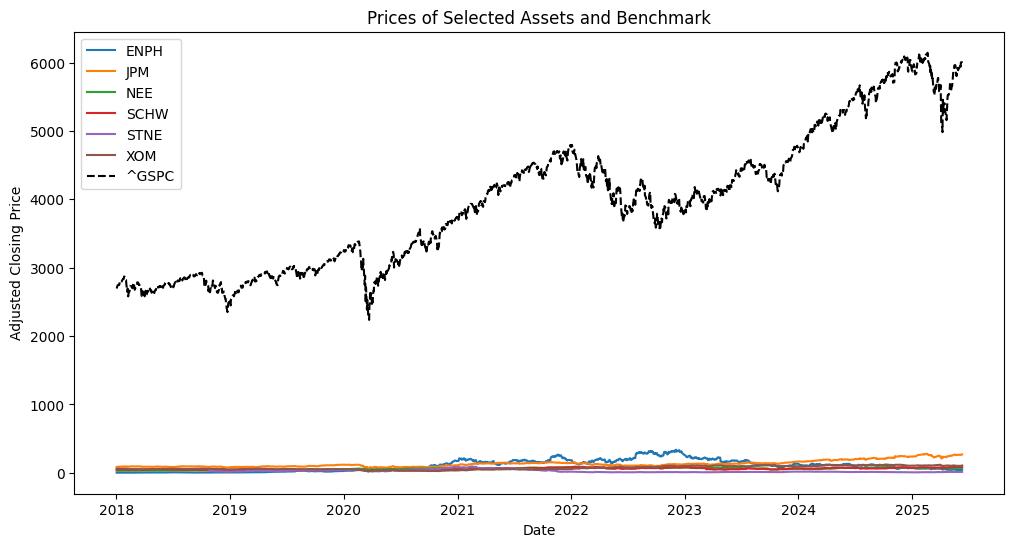

In [ ]:
# Ad esempio, puoi visualizzare il grafico dei prezzi di chiusura
plt.figure(figsize=(12, 6))
for ticker in TICKERS:
    plt.plot(close[ticker], label=ticker)
plt.plot(close[BENCH], label=BENCH, linestyle='--', color='black')
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Prices of Selected Assets and Benchmark")
plt.legend()
plt.savefig('closing_prices.pdf', dpi=300, bbox_inches='tight')
plt.show()

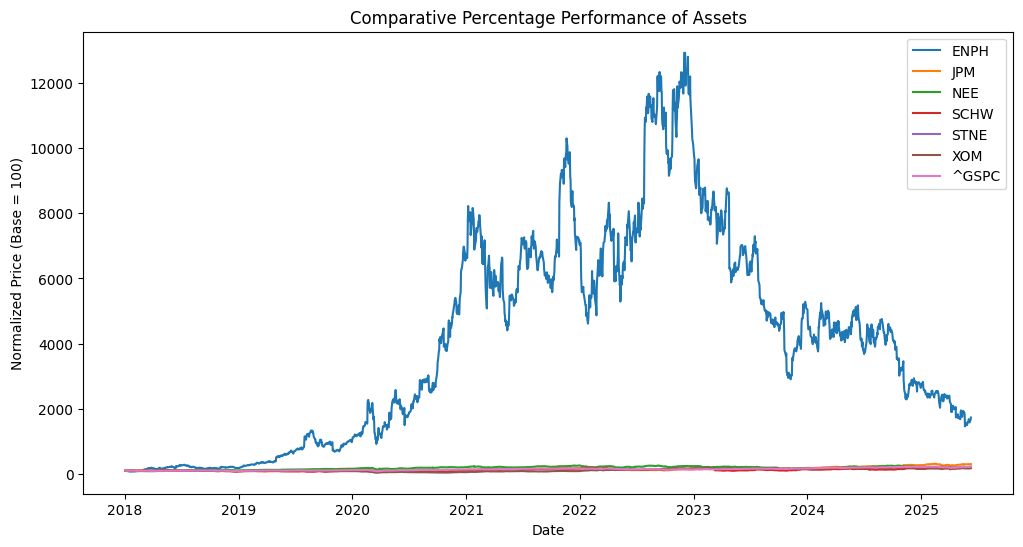

In [ ]:
# Normalizzazione dei dati, impostando il prezzo iniziale pari a 100
close_normalized = close / close.iloc[0] * 100

# Visualizzare il grafico dei prezzi normalizzati
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
for ticker in close_normalized.columns:
    plt.plot(close_normalized.index, close_normalized[ticker], label=ticker)
plt.xlabel("Date")
plt.ylabel("Normalized Price (Base = 100)")
plt.title("Comparative Percentage Performance of Assets")
plt.legend()
plt.savefig('normalized_prices.pdf', dpi=300, bbox_inches='tight')
plt.show()

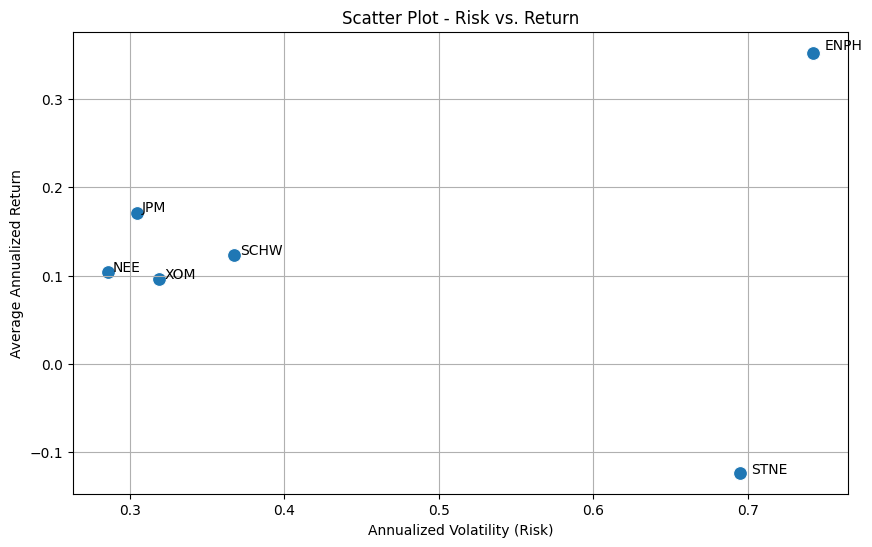

In [ ]:
# Supponendo di aver calcolato i rendimenti giornalieri in 'rets'
# E considerando i nostri ticker (non il benchmark)
import seaborn as sns # Import seaborn

tickers = TICKERS  # ["ENPH", "JPM", "NEE", "SCHW", "STNE", "XOM"]

# Calcolo rendimento medio e volatilità giornaliera
mean_returns = rets[tickers].mean()  # rendimento medio giornaliero
std_returns = rets[tickers].std()      # volatilità giornaliera

# Se vuoi annualizzare, ad esempio:
trading_days = 252
annualized_mean_returns = mean_returns * trading_days
annualized_std_returns = std_returns * np.sqrt(trading_days)

# Scatter plot del rapporto rischio/rendimento (usando i valori annualizzati)
plt.figure(figsize=(10,6))
sns.scatterplot(x=annualized_std_returns, y=annualized_mean_returns, s=100)

# Aggiungi annotazioni per ciascun ticker
for ticker in tickers:
    plt.text(annualized_std_returns[ticker] * 1.01, annualized_mean_returns[ticker] * 1.01, ticker,
             horizontalalignment='left', size='medium', color='black')

plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Average Annualized Return")
plt.title("Scatter Plot - Risk vs. Return")
plt.grid(True)
plt.savefig('risk_return_scatter.pdf', dpi=300, bbox_inches='tight')
plt.show()

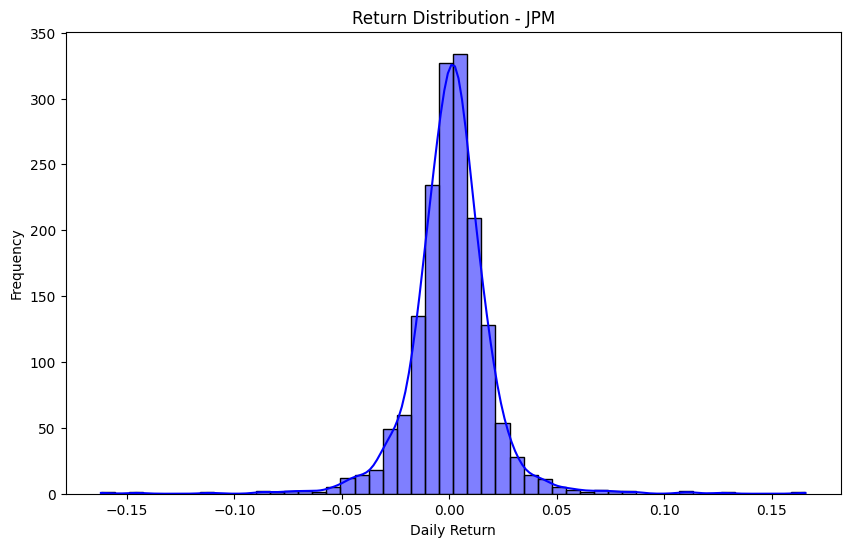

<ipython-input-13-903454256>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rets[ticker], label=ticker, shade=True)
<ipython-input-13-903454256>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rets[ticker], label=ticker, shade=True)
<ipython-input-13-903454256>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rets[ticker], label=ticker, shade=True)
<ipython-input-13-903454256>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rets[ticker], label=ticker, shade=True)
<ipython-input-13-903454256>

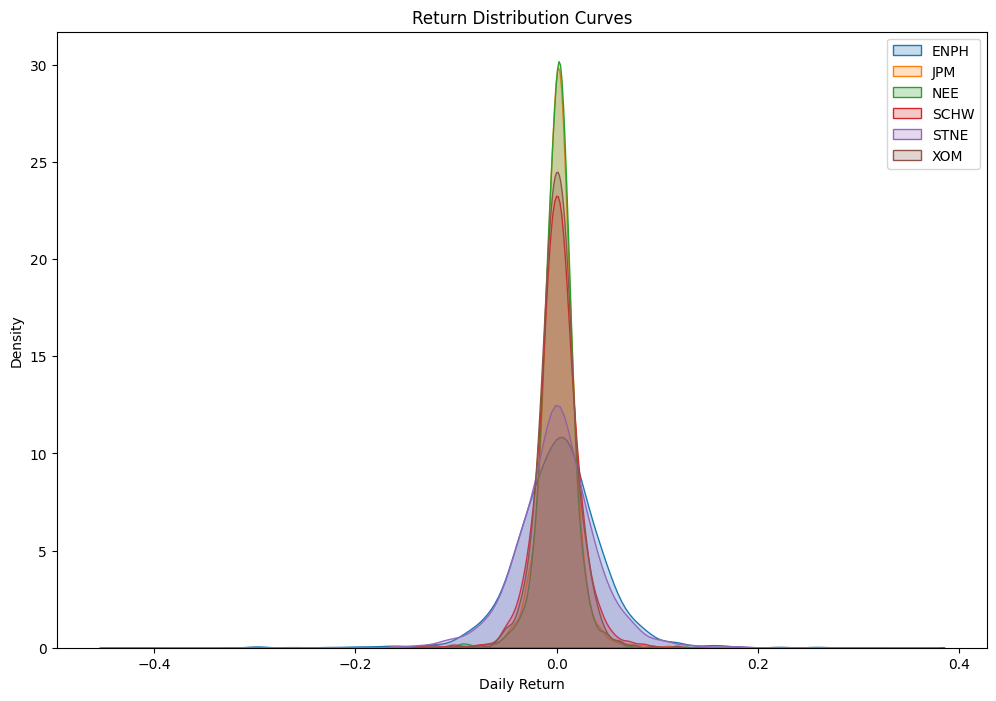

In [ ]:
# Example: Return distribution for JPM
plt.figure(figsize=(10,6))
sns.histplot(rets['JPM'], kde=True, bins=50, color='blue')
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Return Distribution - JPM")

# Save the plot
plt.savefig('return_distribution_jpm.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Multiple KDE curves in one plot
plt.figure(figsize=(12,8))
for ticker in tickers:
    sns.kdeplot(rets[ticker], label=ticker, shade=True)
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.title("Return Distribution Curves")
plt.legend()

# Save the plot
plt.savefig('return_distribution_multiple.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Rolling Volatility (30-day)
# Use 'rets' instead of 'returns'
rolling_vol = rets.rolling(window=30).std()
plt.figure(figsize=(10, 6))
rolling_vol.plot()
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.savefig("rolling_volatility.pdf", dpi=300)
plt.close()

# Rolling Beta (60-day)
window = 60
rolling_beta = {} # Use a dictionary to store rolling beta for each ticker

if BENCH in rets.columns:
    bench_rets_series = rets[BENCH] # Get the benchmark returns as a Series
    # Iterate through each ticker to calculate its rolling beta against the benchmark
    for ticker in TICKERS:
        asset_rets_series = rets[ticker] # Get the asset returns as a Series
        combined_rolling = pd.concat([asset_rets_series, bench_rets_series], axis=1).dropna()
        combined_rolling.columns = ['asset', 'market'] # Rename columns for clarity

        ticker_rolling_beta = []
        # Calculate rolling beta for the current ticker
        for i in range(len(combined_rolling) - window):
            y = combined_rolling['asset'].iloc[i:i+window]
            x = combined_rolling['market'].iloc[i:i+window]
            x = sm.add_constant(x)
            # Ensure there's enough data points for regression
            if len(x) > 1 and len(y) > 1:
                try:
                    model = sm.OLS(y, x).fit()
                    ticker_rolling_beta.append(model.params['market'])
                except ValueError:
                    # Handle cases where regression fails (e.g., all values are the same)
                    ticker_rolling_beta.append(np.nan)
            else:
                 ticker_rolling_beta.append(np.nan) # Not enough data

        # Store the rolling beta as a Series for the current ticker
        rolling_beta[ticker] = pd.Series(ticker_rolling_beta, index=combined_rolling.index[window:])

    # Plot rolling beta for each ticker
    plt.figure(figsize=(10, 6))
    for ticker, beta_series in rolling_beta.items():
        beta_series.plot(label=ticker)

    plt.title(f"60-Day Rolling Beta vs {BENCH}")
    plt.xlabel("Date")
    plt.ylabel("Beta")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    # Save the plot with a meaningful name
    plt.savefig("rolling_beta_multiple.pdf", dpi=300)
    plt.close()
else:
    print(f"Warning: Benchmark ticker '{BENCH}' not found in 'rets' columns. Rolling beta calculation skipped.")


<Figure size 1000x600 with 0 Axes>

In [ ]:
# Calcolo dei rendimenti logaritmici (esempio)
import numpy as np
returns = np.log(close / close.shift(1))

# Seleziona un asset, ad esempio JPM
returns_jpm = returns['JPM'].dropna()

# Salva in CSV
import os
os.makedirs("data", exist_ok=True)  # Crea la cartella se non esiste
returns_jpm.to_csv('data/returns.csv')

<Figure size 800x500 with 0 Axes>

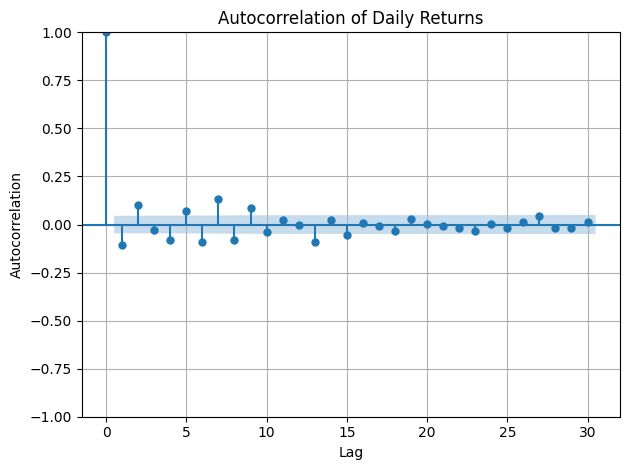

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import os

# Carica il file salvato
returns = pd.read_csv('data/returns.csv', index_col=0, parse_dates=True)['JPM']

# Create the 'figures' directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Crea e salva il grafico
plt.figure(figsize=(8, 5))
plot_acf(returns, lags=30)
plt.title("Autocorrelation of Daily Returns")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid()
plt.tight_layout()
plt.savefig("figures/autocorrelation_returns.pdf", dpi=300)
plt.show()

<ipython-input-27-251429979>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rets[ticker].dropna(), label=ticker, shade=True)
<ipython-input-27-251429979>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rets[ticker].dropna(), label=ticker, shade=True)
<ipython-input-27-251429979>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rets[ticker].dropna(), label=ticker, shade=True)
<ipython-input-27-251429979>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rets[ticker].dropna(), label=ticker, shad

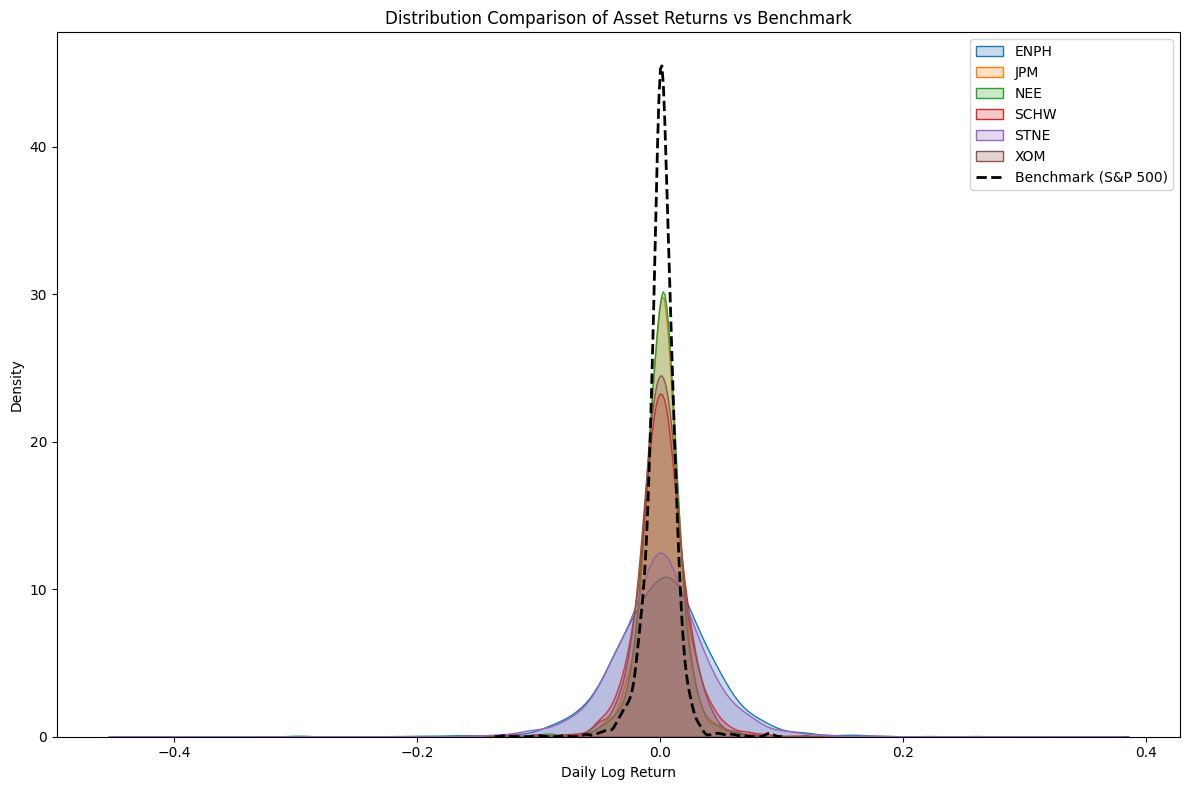

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'rets' is a DataFrame with daily log returns for each asset and the benchmark
tickers = ['ENPH', 'JPM', 'NEE', 'SCHW', 'STNE', 'XOM']  # Example tickers
benchmark = '^GSPC'  # Example benchmark (S&P 500)

plt.figure(figsize=(12, 8))
for ticker in tickers:
    sns.kdeplot(rets[ticker].dropna(), label=ticker, shade=True)
sns.kdeplot(rets[benchmark].dropna(), label='Benchmark (S&P 500)', color='black', linestyle='--', linewidth=2)
plt.xlabel("Daily Log Return")
plt.ylabel("Density")
plt.title("Distribution Comparison of Asset Returns vs Benchmark")
plt.legend()
plt.tight_layout()
plt.savefig("figures/distribution_comparison.pdf", dpi=300)
plt.show()

In [ ]:
from google.colab import files

files.download('closing_prices.pdf')
files.download('normalized_prices.pdf')
files.download('risk_return_scatter.pdf')
files.download('return_distribution_jpm.pdf')
files.download('return_distribution_multiple.pdf')
files.download("rolling_volatility.pdf")
files.download("rolling_beta_multiple.pdf")
files.download("figures/autocorrelation_returns.pdf")
files.download("figures/distribution_comparison.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>